In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 

In [2]:
spo = pd.read_csv('Spotify Dataset.csv')

In [3]:
spo.head()

Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence  target      song_title            artist  
0             4.0    0.286       1        Mask Off            Future  
1             4.0    0.588       1         Redbone  Childish Gambino  
2             4.0    0.173       1    Xanny Family            Future  
3             4.0    0.230       1  Master Of None       Beach House  
4             4.0    0.904       1  Parallel Lines       Junior Boys

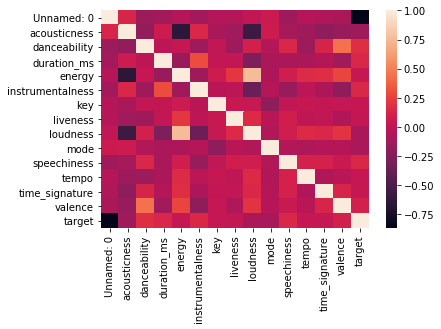

In [4]:
sns.heatmap(spo.corr())

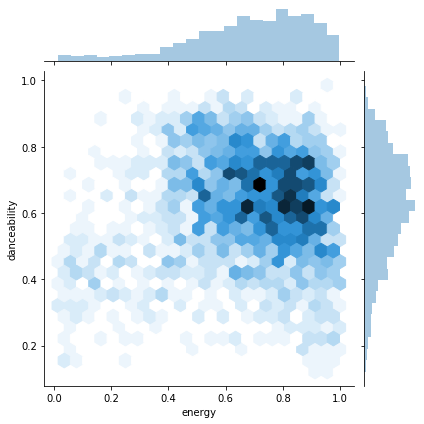

In [5]:
sns.jointplot(x = 'energy' , y = 'danceability' , data = spo , kind= 'hex')

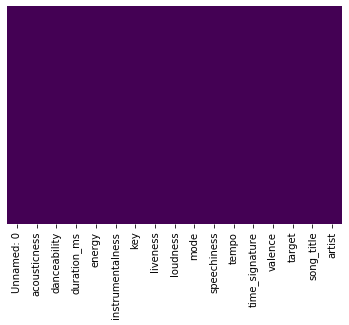

In [6]:
sns.heatmap(spo.isnull(), yticklabels = False , cbar = False, cmap= 'viridis')

now we can see that all the null values are taken care of already ,  so lets just convert the categorical values into Dummies numerical values

Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0              0       0.01020         0.833       204600   0.434   
1              1       0.19900         0.743       326933   0.359   
2              2       0.03440         0.838       185707   0.412   
3              3       0.60400         0.494       199413   0.338   
4              4       0.18000         0.678       392893   0.561   
...          ...           ...           ...          ...     ...   
2012        2012       0.00106         0.584       274404   0.932   
2013        2013       0.08770         0.894       182182   0.892   
2014        2014       0.00857         0.637       207200   0.935   
2015        2015       0.00164         0.557       185600   0.992   
2016        2016       0.00281         0.446       204520   0.915   

      instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0             0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1             0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2             0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3             0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4             0.512000    5    0.4390   -11.648     0       0.0694  174.004   
...                ...  ...       ...       ...   ...          ...      ...   
2012          0.002690    1    0.1290    -3.501     1       0.3330   74.976   
2013          0.001670    1    0.0528    -2.663     1       0.1310  110.041   
2014          0.003990    0    0.2140    -2.467     1       0.1070  150.082   
2015          0.677000    1    0.0913    -2.735     1       0.1330  150.011   
2016          0.000039    9    0.2180    -6.221     1       0.1410  190.013   

      time_signature  valence  target                            song_title  \
0                4.0    0.286       1                              Mask Off   
1                4.0    0.588       1                               Redbone   
2                4.0    0.173       1                          Xanny Family   
3                4.0    0.230       1                        Master Of None   
4                4.0    0.904       1                        Parallel Lines   
...              ...      ...     ...                                   ...   
2012             4.0    0.211       0   Like A Bitch - Kill The Noise Remix   
2013             4.0    0.867       0                                 Candy   
2014             4.0    0.470       0  Habit - Dack Janiels & Wenzday Remix   
2015             4.0    0.623       0                         First Contact   
2016             4.0    0.402       0                    I Wanna Get Better   

                artist  
0               Future  
1     Childish Gambino  
2               Future  
3          Beach House  
4          Junior Boys  
...                ...  
2012    Kill The Noise  
2013    Dillon Francis  
2014          Rain Man  
2015        Twin Moons  
2016         Bleachers  

[2017 rows x 17 columns]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train , x_test , y_train , y_test = train_test_split(spo.drop(['target' , 'song_title' , 'artist'] , axis = 1) , spo['target'] , test_size = 0.3 , random_state = 0)

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
regressor = LogisticRegression()
regressor.fit(x_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
prediction = regressor.predict(x_test) 

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
accuracy = confusion_matrix(y_test , prediction)

In [15]:
from sklearn.metrics import accuracy_score 

In [16]:
accuracy2 = accuracy_score(y_test , prediction)
accuracy2

0.9570957095709571

In [17]:
regressor

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)